In [1]:
# %matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
import requests

# Access cleaned housing data (using Power Query in Excel)

metro_hv_df = pd.read_csv("Data/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month_modified.csv")
metro_inventory_df = pd.read_csv("Data/Metro_invt_fs_uc_sfr_sm_month_modified.csv")
zipcode_hv_df = pd.read_csv("Data/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month_modified.csv")
census_df = pd.read_csv("Data/Census/all_census_data_zipcode.csv")

# Merge house value file with census file
hv_census_df = pd.merge(zipcode_hv_df, census_df, how='outer', on='Zipcode_Year')

# Drop zipcodes that don't have exist in one of the files
hv_census_df = hv_census_df.dropna()

# Adding affordability column (how many years of household income would it take to buy a house at the average house price)
hv_census_df["Affordability"] = hv_census_df["Average House Price"] / hv_census_df["Household Income"]

hv_census_df = hv_census_df.drop(columns=['Zipcode_y', 'Year_y'])
hv_census_df = hv_census_df.rename(columns={"Zipcode_x": "Zipcode", "Year_x": "Year"})
hv_census_df["Zipcode"] = hv_census_df["Zipcode"].astype(int)
hv_census_df["Year"] = hv_census_df["Year"].astype(int)
hv_census_df["Population"] = hv_census_df["Population"].astype(int)
hv_census_df["Household Income"] = hv_census_df["Household Income"].astype(int)
hv_census_df["Per Capita Income"] = hv_census_df["Per Capita Income"].astype(int)
hv_census_df["Poverty Count"] = hv_census_df["Poverty Count"].astype(int)
hv_census_df["Average House Price"] = hv_census_df["Average House Price"].round(2)
# hv_census_df["Affordability"] = hv_census_df["Affordability"].round(2)

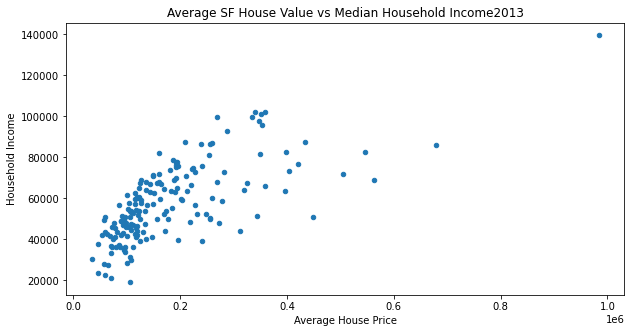

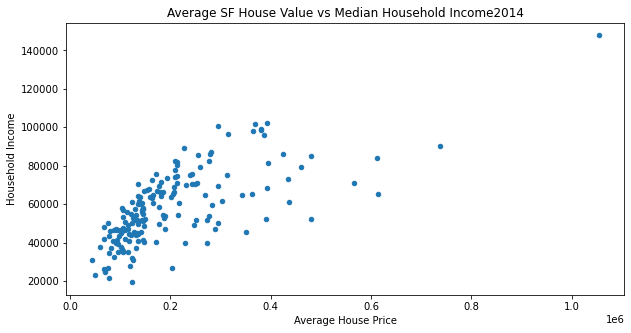

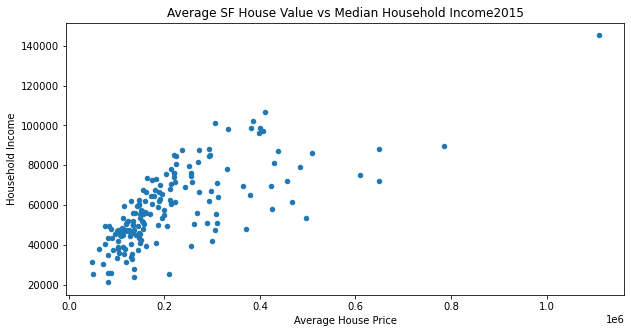

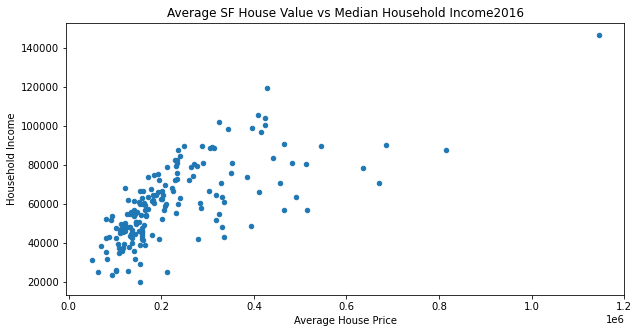

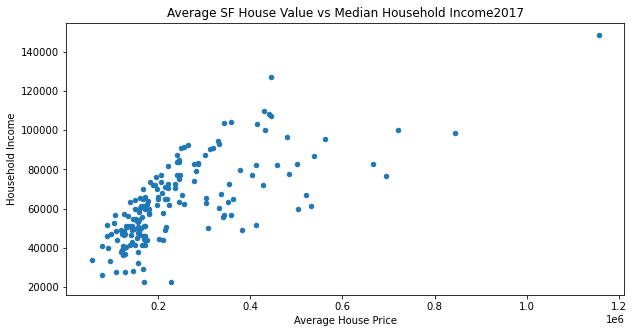

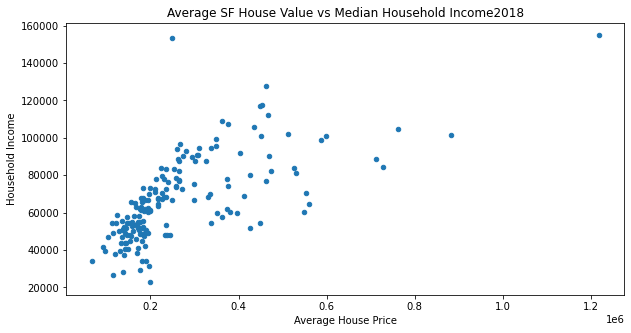

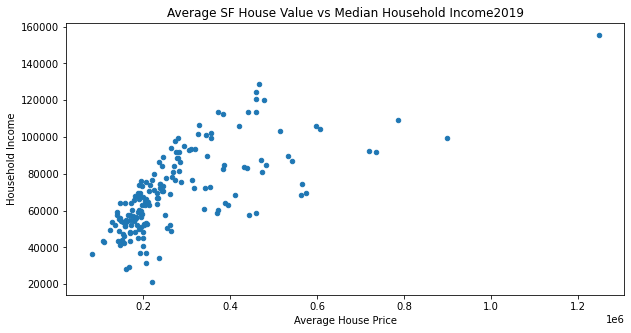

In [2]:
# Scatterplot House value vs Median household income per year

for x in range(2013, 2020):

    price_income_df = hv_census_df.loc[hv_census_df["Year"] == x]

    price_income_df = price_income_df.iloc[:, [2, 6]]

    price_income_df
    
    fig1 = price_income_df.plot.scatter(x = "Average House Price",
                                    y = "Household Income", 
                                    figsize = (10,5), 
                                    title = "Average SF House Value vs Median Household Income" + str(x))

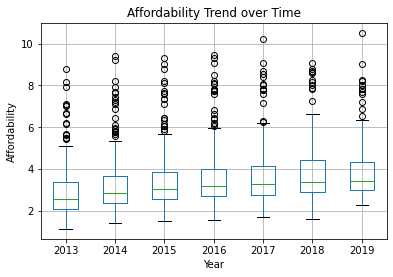

In [3]:
# Scatterplot chart for household income vs home value Ratio by year

hv_census_df.boxplot(column = "Affordability", by="Year")

plt.title("Affordability Trend over Time")
plt.suptitle("")
plt.ylabel("Affordability")

plt.savefig("Affordability Trend over Time by Zipcode.jpg")

plt.show()

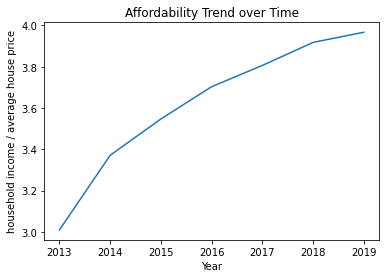

In [4]:
# Line chart for household income vs home value Ratio by year

hv_census_groupby_year_df = hv_census_df.groupby(by = ["Year"])["Affordability"].mean()

hv_census_groupby_year_df.plot.line(title = "Affordability Trend over Time", ylabel = "household income / average house price")

plt.savefig("Affordability Trend over Time.jpg")

In [5]:
# hv_census_groupby_year_just_year_affordability_df = hv_census_groupby_year_df["Year", "Affordability"].corr()

hv_census_groupby_year_df = hv_census_groupby_year_df.reset_index()

hv_census_groupby_year_df.corr()

,Year,Affordability
Year,1.000000,0.960871
Affordability,0.960871,1.000000


In [6]:
# ANOVA Test to see whether the differences are meaningful

import scipy.stats as stats

hv_census_pivot_df = hv_census_df.pivot(index = "Zipcode", columns = "Year", values = "Affordability")

hv_census_pivot_df = hv_census_pivot_df.loc[hv_census_pivot_df[2015] > 0]

hv_census_pivot_df = hv_census_pivot_df.loc[hv_census_pivot_df[2017] > 0]

# hv_census_pivot_df = hv_census_pivot_df.replace("", nan_value, inplace=True)

# hv_census_pivot_df = hv_census_pivot_df.dropna()

for x in range(2013, 2019):

    next_year = x+1
    
    fvalue, pvalue = stats.f_oneway(hv_census_pivot_df[x], hv_census_pivot_df[next_year])
    
    pvalue = pvalue.round(2)
    
    if pvalue < 0.05:
        print(f'There is significant difference in house affordability between {x} and {next_year} (p = {pvalue}).')
    else: print(f'There is no significant difference in house affordability between {x} and {next_year} (p = {pvalue}).')
        
fvalue, pvalue = stats.f_oneway(hv_census_pivot_df[2013], hv_census_pivot_df[2019])

if pvalue < 0.5:
    print(f'There is significant difference in house affordability between 2013 and 2019 (p = {pvalue}).')
else: print(f'There is no significant difference in house affordability between 2013 and 2019 (p = {pvalue}).')

There is significant difference in house affordability between 2013 and 2014 (p = 0.03).
There is no significant difference in house affordability between 2014 and 2015 (p = 0.31).
There is no significant difference in house affordability between 2015 and 2016 (p = 0.4).
There is no significant difference in house affordability between 2016 and 2017 (p = 0.53).
There is no significant difference in house affordability between 2017 and 2018 (p = 0.52).
There is no significant difference in house affordability between 2018 and 2019 (p = 0.77).
There is significant difference in house affordability between 2013 and 2019 (p = 5.6174103184267105e-09).
